In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pip install mysql-connector-python
import mysql.connector

In [2]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\data\Google-Playstore.csv")

In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

(2312944, 24)

In [4]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [5]:
df.isnull().sum()

App Name                  5
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [6]:
missing_percentage = (df.isnull().sum().sort_values(ascending = False)/len(df))*100
missing_percentage

Developer Website    32.894657
Privacy Policy       18.199879
Released              3.071972
Rating                0.989345
Rating Count          0.989345
Minimum Android       0.282324
Size                  0.008474
Currency              0.005837
Installs              0.004626
Minimum Installs      0.004626
Developer Id          0.001427
Developer Email       0.001340
App Name              0.000216
App Id                0.000000
Price                 0.000000
Free                  0.000000
Maximum Installs      0.000000
Last Updated          0.000000
Content Rating        0.000000
Category              0.000000
Ad Supported          0.000000
In App Purchases      0.000000
Editors Choice        0.000000
Scraped Time          0.000000
dtype: float64

In [7]:
#Dropping unnecessary columns
df=df.drop(columns=['Rating','Currency','App Name','App Id','Minimum Installs','Maximum Installs','Developer Id','Developer Website','Minimum Android','Developer Email','Released','Last Updated','Privacy Policy','Scraped Time'])

In [8]:
df['Category'].unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [9]:
df['Content Rating'].value_counts()

Content Rating
Everyone           2022089
Teen                196375
Mature 17+           60289
Everyone 10+         33901
Unrated                154
Adults only 18+        136
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Category          object 
 1   Rating Count      float64
 2   Installs          object 
 3   Free              bool   
 4   Price             float64
 5   Size              object 
 6   Content Rating    object 
 7   Ad Supported      bool   
 8   In App Purchases  bool   
 9   Editors Choice    bool   
dtypes: bool(4), float64(2), object(4)
memory usage: 114.7+ MB


In [11]:
# Display the transformed dataframe
df

,Category,Rating Count,Installs,Free,Price,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Adventure,0.0,10+,True,0.0,10M,Everyone,False,False,False
1,Tools,64.0,"5,000+",True,0.0,2.9M,Everyone,True,False,False
2,Productivity,0.0,50+,True,0.0,3.7M,Everyone,False,False,False
3,Communication,5.0,10+,True,0.0,1.8M,Everyone,True,False,False
4,Tools,0.0,100+,True,0.0,6.2M,Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2312939,Role Playing,16775.0,"100,000+",True,0.0,77M,Teen,False,False,False
2312940,Education,0.0,100+,True,0.0,44M,Everyone,False,False,False
2312941,Education,0.0,100+,True,0.0,29M,Everyone,False,False,False
2312942,Music & Audio,8.0,"1,000+",True,0.0,10M,Everyone,True,False,False


In [12]:
df.isnull().sum()

Category                0
Rating Count        22883
Installs              107
Free                    0
Price                   0
Size                  196
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
dtype: int64

In [13]:
df['Size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

In [14]:
df['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', nan,
       '50,000,000+', '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [15]:
def convert_to_mb(size):
    if isinstance(size, str):
        # Remove commas from the string
        size = size.replace(',', '')

        if 'k' in size:
            # Remove 'k' and convert to MB (1 MB = 1024 KB)
            size = float(size.replace('k', '')) / 1024
        elif 'M' in size:
            # Remove 'M' (already in MB)
            size = float(size.replace('M', ''))
        elif 'G' in size:
            # Remove 'G' and convert to MB (1GB = 1024 MB)
            size = float(size.replace('G', '')) * 1024
        elif 'Varies with device' in size:
            return np.nan

    return size

In [16]:
df['Size'] = df['Size'].apply(convert_to_mb)
# Rename the column 'Size' to 'Size_in_Mb'
df.rename(columns={'Size': 'Size_in_Mb'}, inplace=True)

In [17]:
# Repeat the process for Rating
Q1 = df['Size_in_Mb'].quantile(0.25)
Q3 = df['Size_in_Mb'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Size_in_Mb'] < lower_bound) | (df['Size_in_Mb'] > upper_bound)]
print("\nOutliers in Size column:")
print(outliers)


Outliers in Size column:
                  Category  Rating Count  Installs  Free  Price  Size_in_Mb  \
18               Lifestyle         328.0   10,000+  True    0.0        70.0   
53        Health & Fitness           0.0       10+  True    0.0       147.0   
110          Entertainment           0.0      100+  True    0.0        67.0   
136       Health & Fitness           0.0       10+  True    0.0        67.0   
174      Books & Reference           0.0      500+  True    0.0        60.0   
...                    ...           ...       ...   ...    ...         ...   
2312861   Health & Fitness         172.0   10,000+  True    0.0        61.0   
2312887     Travel & Local          10.0    1,000+  True    0.0        58.0   
2312888          Adventure           0.0       10+  True    0.0        73.0   
2312929      Entertainment          23.0    1,000+  True    0.0        65.0   
2312939       Role Playing       16775.0  100,000+  True    0.0        77.0   

        Content Rating  A

In [18]:
#Replace null values in size column with median category wise
#As mean values is greater than median and data is +vely skewed hence replacing with median
#df['Size_in_Mb'] = df['Size_in_Mb'].fillna(df.groupby('Category')['Size_in_Mb'].transform('median').round(2))
# Drop rows where 'Size_in_Mb' is null instead of replacing with median
df.dropna(subset=['Size_in_Mb'], inplace=True)


In [19]:
df.isnull().sum()

Category              0
Rating Count        958
Installs             39
Free                  0
Price                 0
Size_in_Mb            0
Content Rating        0
Ad Supported          0
In App Purchases      0
Editors Choice        0
dtype: int64

In [20]:
# Convert to string first, then remove '+' and commas
df['Installs'] = df['Installs'].astype(str)
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '').replace(',', '') if x != 'nan' else '0')

# Convert to integer
df['Installs'] = df['Installs'].astype(np.int64)

# Check the unique values
df['Installs'].unique()
df['Installs'].value_counts()


Installs
100           432654
1000          387741
10            290921
10000         247706
500           184146
50            166032
5000          139250
100000        104339
50000          71973
5              71104
1              63044
1000000        30558
500000         25081
0              11303
5000000         5791
10000000        5271
50000000         629
100000000        379
500000000         33
1000000000        16
Name: count, dtype: int64

In [21]:
# Drop rows where 'Installs' has NaN values
df.dropna(subset=['Installs','Rating Count'], inplace=True)

# Verify the result
print(df['Installs'].isna().sum())  # Should print 0

0


In [22]:
import pandas as pd

# Ensure Installs is numeric (only if it's a string)
df['Installs'] = df['Installs'].astype(int)

# Define bins and labels
bins = [
    0, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000,
    50000000, 100000000, float('inf')
]
labels = [
    'Between 0 and 10k',
    'Between 10k and 50k',
    'Between 50k and 100k',
    'Between 100k and 500k',
    'Between 500k and 1M',
    'Between 1M and 5M',
    'Between 5M and 10M',
    'Between 10M and 50M',
    'Between 50M and 100M',
    'Greater than 100M'
]

# Categorize Installs into the bins
df['Installs_Category'] = pd.cut(df['Installs'], bins=bins, labels=labels, right=False, ordered=True)


print(df[['Installs', 'Installs_Category']].head())



   Installs  Installs_Category
0        10  Between 0 and 10k
1      5000  Between 0 and 10k
2        50  Between 0 and 10k
3        10  Between 0 and 10k
4       100  Between 0 and 10k


In [23]:
from sklearn.preprocessing import LabelEncoder
import pickle

def label_encoding(data, category_col):
    # le = LabelEncoder()
    # data[category_col] = le.fit_transform(data[category_col])

    unique_category=df[category_col].unique()
    
    # Save the label encoding mapping
    label_mapping = {category: idx for idx, category in enumerate(unique_category)}
    file_name = f"{category_col}_label_encoded.pkl"
    with open(file_name, "wb") as f:
        pickle.dump(label_mapping, f)
    
    data[category_col]=data[category_col].map(label_mapping)

    
    print(f"Label encoding mapping for '{category_col}' saved in '{file_name}'")
    return data[category_col]

# Apply Label Encoding and save mappings separately
df['Category'] = label_encoding(df, 'Category')
df['Content Rating'] = label_encoding(df, 'Content Rating')
df['Installs_Category'] = label_encoding(df, 'Installs_Category')

# Verify the result
print(df.head())


Label encoding mapping for 'Category' saved in 'Category_label_encoded.pkl'
Label encoding mapping for 'Content Rating' saved in 'Content Rating_label_encoded.pkl'
Label encoding mapping for 'Installs_Category' saved in 'Installs_Category_label_encoded.pkl'
   Category  Rating Count  Installs  Free  Price  Size_in_Mb  Content Rating  \
0         0           0.0        10  True    0.0        10.0               0   
1         1          64.0      5000  True    0.0         2.9               0   
2         2           0.0        50  True    0.0         3.7               0   
3         3           5.0        10  True    0.0         1.8               0   
4         1           0.0       100  True    0.0         6.2               0   

   Ad Supported  In App Purchases  Editors Choice Installs_Category  
0         False             False           False                 0  
1          True             False           False                 0  
2         False             False           False  

In [24]:
df.columns

Index(['Category', 'Rating Count', 'Installs', 'Free', 'Price', 'Size_in_Mb',
       'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Installs_Category'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237013 entries, 0 to 2312943
Data columns (total 11 columns):
 #   Column             Dtype   
---  ------             -----   
 0   Category           int64   
 1   Rating Count       float64 
 2   Installs           int32   
 3   Free               bool    
 4   Price              float64 
 5   Size_in_Mb         float64 
 6   Content Rating     int64   
 7   Ad Supported       bool    
 8   In App Purchases   bool    
 9   Editors Choice     bool    
 10  Installs_Category  category
dtypes: bool(4), category(1), float64(3), int32(1), int64(2)
memory usage: 121.6 MB


In [26]:
df.head()

,Category,Rating Count,Installs,Free,Price,Size_in_Mb,Content Rating,Ad Supported,In App Purchases,Editors Choice,Installs_Category
0,0,0.0,10,True,0.0,10.0,0,False,False,False,0
1,1,64.0,5000,True,0.0,2.9,0,True,False,False,0
2,2,0.0,50,True,0.0,3.7,0,False,False,False,0
3,3,5.0,10,True,0.0,1.8,0,True,False,False,0
4,1,0.0,100,True,0.0,6.2,0,False,False,False,0


In [27]:
# boolean columns to 0 and 1
bool_cols = ['Free', 'Ad Supported', 'In App Purchases','Editors Choice']
# Fill NaN values with False (0) before converting to integers
df[bool_cols] = df[bool_cols].fillna(False).astype(int)

In [28]:
df.head()

,Category,Rating Count,Installs,Free,Price,Size_in_Mb,Content Rating,Ad Supported,In App Purchases,Editors Choice,Installs_Category
0,0,0.0,10,1,0.0,10.0,0,0,0,0,0
1,1,64.0,5000,1,0.0,2.9,0,1,0,0,0
2,2,0.0,50,1,0.0,3.7,0,0,0,0,0
3,3,5.0,10,1,0.0,1.8,0,1,0,0,0
4,1,0.0,100,1,0.0,6.2,0,0,0,0,0


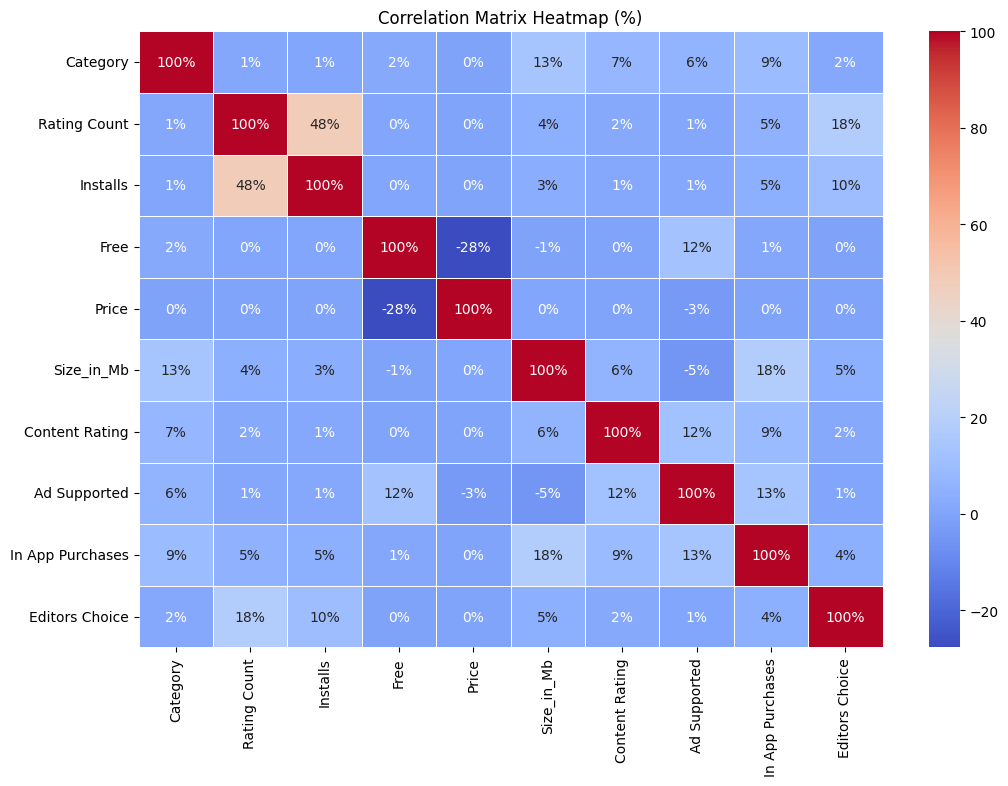

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Drop 'Installs Category' before calculating correlation
df_corr = df.drop(columns=["Installs_Category"], errors="ignore")  # Avoids error if column is missing

# Compute the correlation matrix and convert to percentage
corr_matrix = df_corr.corr() * 100

# Fill NaN values with 0 and format annotations
annot = corr_matrix.fillna(0).replace([np.inf, -np.inf], 0).round(0).astype(int).astype(str) + '%'

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=annot, cmap='coolwarm', fmt='', linewidths=0.5)
plt.title("Correlation Matrix Heatmap (%)")
plt.show()


In [30]:
df.drop(['Price','Installs'], axis=1, inplace=True)


In [31]:
df.columns = df.columns.str.replace(' ', '_')


In [32]:
# df_sampled = df.sample(n=200000, random_state=42)
df.to_csv("installs_preprocessed.csv", index=False)

In [ ]:
# Load CSV into Pandas
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\Google-Playstore-Analysis-and-Prediction-System-main\Google-Playstore-Analysis-and-Prediction-System-main\installs_preprocessed.csv")

# Connect to MySQL
conn = mysql.connector.connect(host="localhost", user="root", password="root", database="GooglePlayStore")
cursor = conn.cursor()

# Adjusted SQL query without the Price column
for _, row in df.iterrows():
    cursor.execute("""
    INSERT INTO installs (`Category`, `Rating_Count`, `Free`, `Size_in_Mb`, `Content_Rating`, `Ad_Supported`, `In_App_Purchases`, `Editors_Choice`, `Installs_Category`)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
""", tuple(row))



# Commit and close
conn.commit()
cursor.close()
conn.close()

print("CSV uploaded successfully!")



In [33]:
# Ensure numeric conversion (handling errors and NaNs)
# df["Installs"] = pd.to_numeric(df["Installs"], errors="coerce").fillna(0).astype(int)
# df["Free"] = pd.to_numeric(df["Free"], errors="coerce").fillna(0).astype(int)
# df["Rating Count"] = pd.to_numeric(df["Rating Count"], errors="coerce").fillna(0).astype(int)
# df["Editors Choice"] = pd.to_numeric(df["Editors Choice"], errors="coerce").fillna(0).astype(int)

# Group by 'Category' and apply different aggregation functions
category_stats = (
    df.groupby("Category")
    .agg({
        "Rating_Count": "mean",  # Median for Rating Count
        "Editors_Choice": "mean"  # Median for Editors Choice
    })
    .round()
    .fillna(0)  # Fill any remaining NaNs with 0
    .astype(int)  # Convert to integers
    .to_dict(orient="index")
)


# Save as a pickle file
with open("mean_values.pkl", "wb") as f:
    pickle.dump(category_stats, f)

In [ ]:
print(df['Installs_Category'].value_counts()) 